# Narration

Vi ser på hvordan punktuering, og andre høyfrekvente ord utvikler seg i en tekst.

In [1]:
from dhlab.module_update import css
from narration_code import display
import dhlab.text as dh

In [2]:
css()

Bygger først et korpus over dine bøker i bokhylla

In [5]:
corpus = dh.Corpus(doctype = "digavis", title= "minneapolistidende", limit = 100)
corpus.corpus[['urn', 'title','author','year', 'subjects']].head(5)

,urn,title,author,year,subjects
0,URN:NBN:no-nb_digavis_minneapolistidende_null_...,minneapolistidende,,1930,
1,URN:NBN:no-nb_digavis_minneapolistidende_null_...,minneapolistidende,,1923,
2,URN:NBN:no-nb_digavis_minneapolistidende_null_...,minneapolistidende,,1933,
3,URN:NBN:no-nb_digavis_minneapolistidende_null_...,minneapolistidende,,1928,
4,URN:NBN:no-nb_digavis_minneapolistidende_null_...,minneapolistidende,,1923,


In [6]:
corpus = dh.Corpus(doctype = "digibok", title= "sult", limit = 10)
corpus.corpus[['urn', 'title','author','year', 'subjects']].head(5)

,urn,title,author,year,subjects
0,URN:NBN:no-nb_digibok_2016011906027,Sult,"Hamsun , Knut",2009,
1,URN:NBN:no-nb_digibok_2015051929001,Sult,"Hamsun , Knut",1890,
2,URN:NBN:no-nb_digibok_2018073048232,Sult,"Hamsun , Knut / Kolloen , Ingar Sletten",2009,norske / romaner / 1890-tallet
3,URN:NBN:no-nb_digibok_2014031108009,Samlede Verker. B. 1 : Sult ; Pan ; Victoria,"Hamsun , Knut",1918,
4,URN:NBN:no-nb_digibok_2016021609081,Sult : etter en roman av Knut Hamsun,"Sundvor , Yngve / Hamsun , Knut",1998,


Så plottes alle bøkene over egenskapen tetthet av punktum. Tallet langs y-aksen er antall punktum pr. 500 ord (men det kan settes som du vil når appen blir klar). Kurven fremkommer gjennom å starte ved første ord i boka, så samle de neste 500 token (ord og punktueringer), for så å repetere øvelsen for hvert 50nde ord gjennom hele teksten. For _Archive in Motion_ var det noen artige spikes - de skyldes kanskje overgangen mellom artikler?

/tmp/ipykernel_3771885/1366360257.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = dh.Dispersion(corpus.corpus.urn[6], wordbag  =['.',','])


<Axes: >

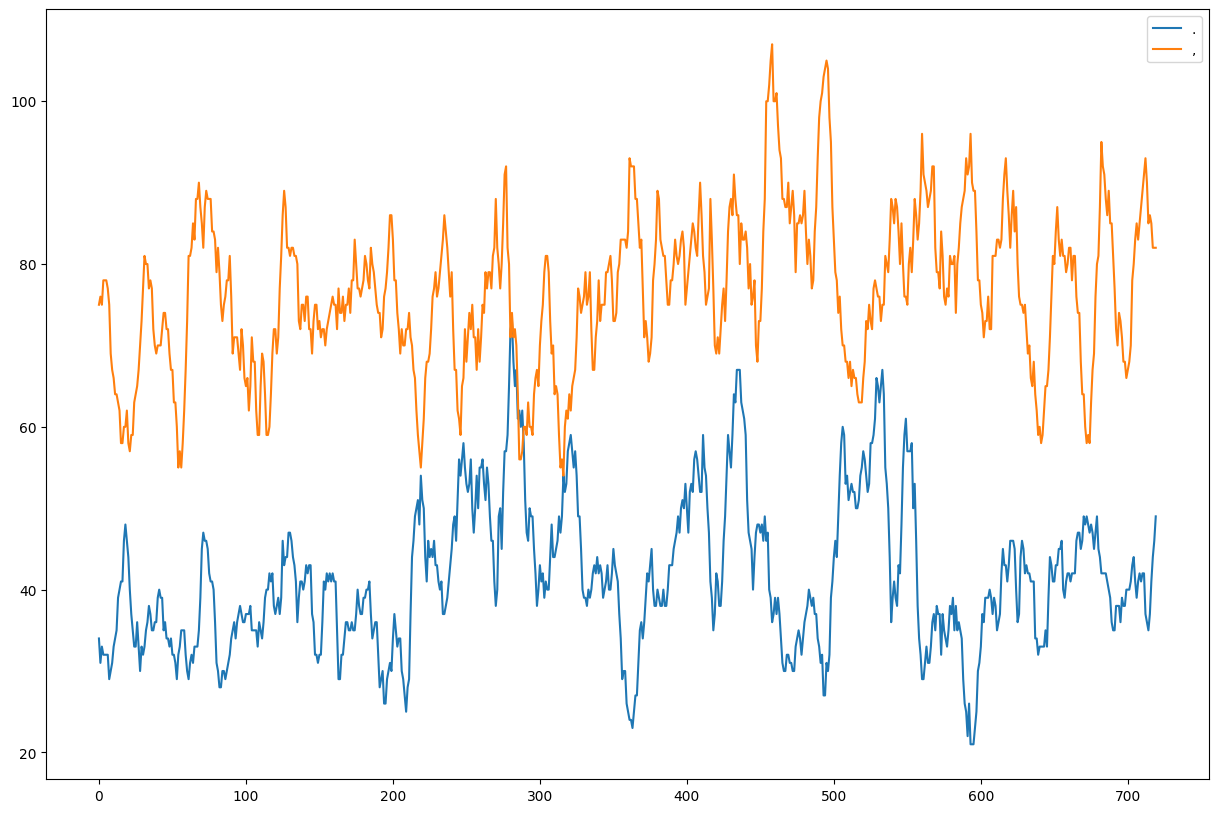

In [10]:
a.dispersion.plot()

In [58]:
#a.dispersion.columns = ['freq']

In [59]:
import pandas as pd

In [60]:
import numpy as np


In [61]:
ft = np.fft.fft(a.dispersion['.'])

/home/larsj/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


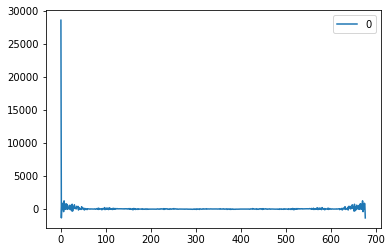

In [62]:
pd.DataFrame(ft).plot()

In [63]:
import matplotlib.pyplot as plt

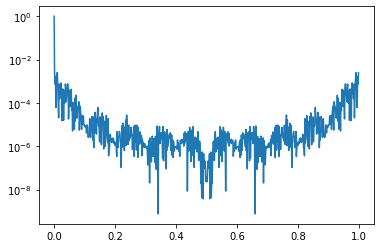

In [64]:
num=np.size(a.dispersion)
freq = [i / num for i in list(range(num))]

# get the list of spectrums
spectrum=ft.real*ft.real+ft.imag*ft.imag
nspectrum=spectrum/spectrum[0]

# plot nspectrum per frequency, with a semilog scale on nspectrum
plt.semilogy(freq, nspectrum)

In [50]:
ft.imag

array([ 2.13162821e-14,  9.72902527e+01, -1.02054293e+02, -2.40091371e+01,
        1.17540994e+02, -8.96531958e+01,  4.87587309e+01, -5.42844061e+01,
        1.05577533e+02,  7.56312061e+01,  2.20175515e+02,  4.81913886e+01,
       -1.05645149e+02,  5.98041083e+01, -6.53918492e+01, -5.81249764e+01,
        8.19493977e+01,  7.73421505e+01,  4.49592439e+01, -2.55369578e+01,
       -2.01046325e+01, -6.07637364e+00,  4.16753966e+00, -7.39038184e+00,
       -1.12713677e+00,  5.53908760e+00,  2.89920718e+01,  1.46016487e+01,
       -5.10948110e+01, -5.11056845e+01, -2.81863629e+01,  8.44997916e+01,
        2.88266380e+01,  1.47063654e+01, -1.59045004e+01, -1.27629264e+01,
       -6.04767001e+01,  6.10089554e+01,  5.59976394e+01, -4.38302432e+01,
        4.87237219e+00,  2.71178761e+01,  3.57718124e+00,  9.70480606e-01,
        4.22671163e+00, -9.78421682e-01,  6.07007994e+00, -3.96330229e+00,
       -5.54243487e-01,  1.94736998e+01, -5.79805711e+00,  1.34695798e+01,
       -4.44400733e-01,  

Vi prøver med et korpus fra Derrida

In [10]:
derrida = dh.Corpus(author="Derrida", limit = 20)
derrida.corpus[['urn', 'title','authors','year', 'subjects']]

,urn,title,authors,year,subjects
0,URN:NBN:no-nb_digibok_2015021106159,"Lovens makt : ""autoritetenes mystiske grunnlag""","Derrida , Jacques / Ekeland , Bjørn C. / Ekela...",2002,Rettsfilosofi / lover / rettsfilosofi / filoso...
1,URN:NBN:no-nb_digibok_2011032508114,Adjø til Emmanuel Levinas,"Derrida , Jacques / Myklebust , Ragnar Braasta...",2002,Filosofi / Filosofer / fransk / filosofi
2,URN:NBN:no-nb_digibok_2008062501030,"Marx' spøkelser : gjeldsstaten, sorgarbeidet o...","Derrida , Jacques / Gundersen , Karin",1996,Marxisme / marxisme / kommunisme / 1990-tallet...
3,URN:NBN:no-nb_digibok_2011082308261,Dekonstruksjon : klassiske tekster i utvalg,"Derrida , Jacques / Gundersen , Karin",2006,Dekonstruktivisme / Dekonstruksjon / fransk / ...
4,URN:NBN:no-nb_digibok_2020091607536,Sannheten i maleriet : restitusjoner av sannhe...,"Derrida , Jacques / Hammer , Espen / Myklebust...",2004,Kunst / Filosofi og teori / Filosofi / Kunstte...


Her er kurvene for punktum i noen (ikke alle bøkene i korpuset lot seg vise)

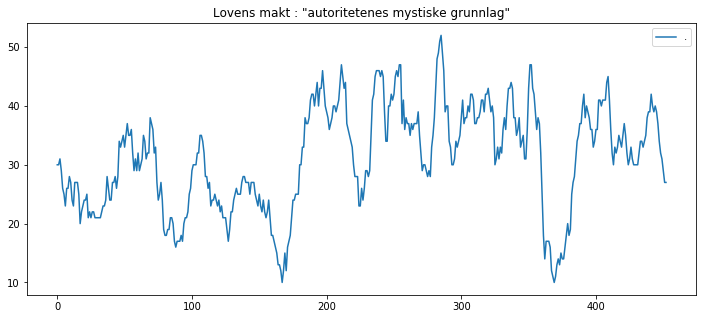

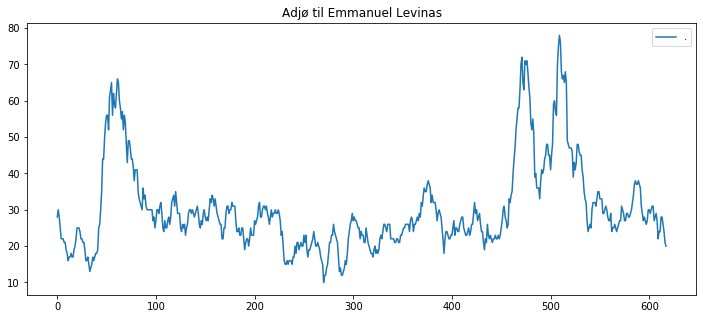

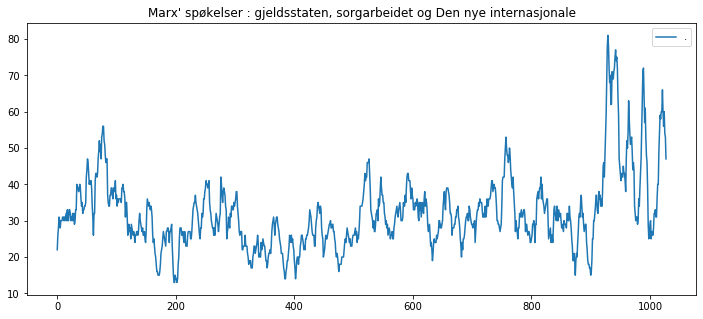

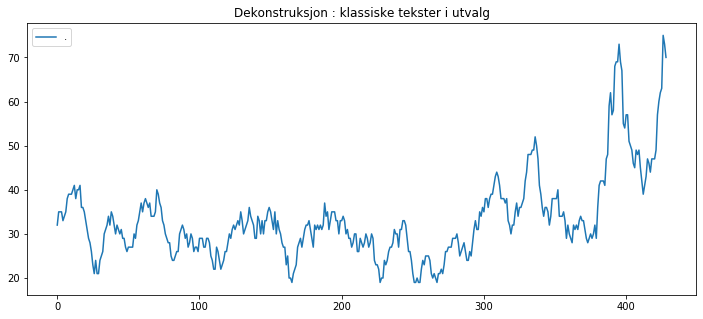

In [11]:
display(derrida)